In [101]:
import numpy as np
import sep

In [102]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [103]:
# read image into standard 2D array
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")

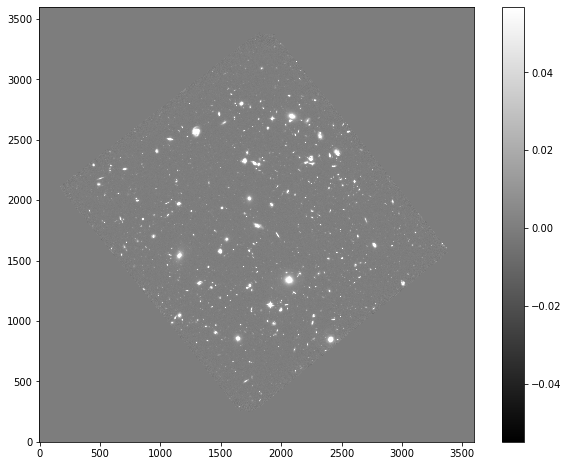

In [104]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('stars')

In [105]:
# change byte order of array
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [106]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0007103732204996049


In [107]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

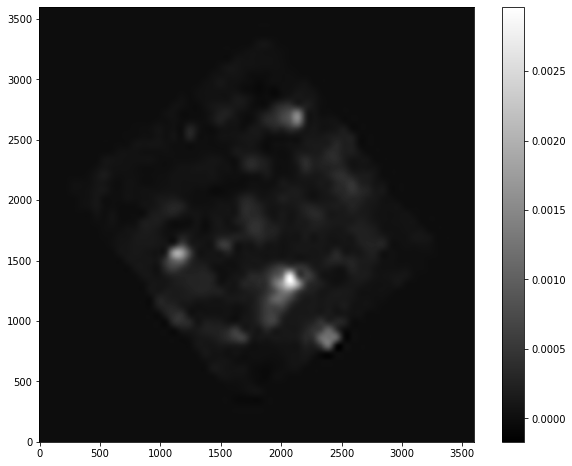

In [108]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('bkg_image1')

In [109]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

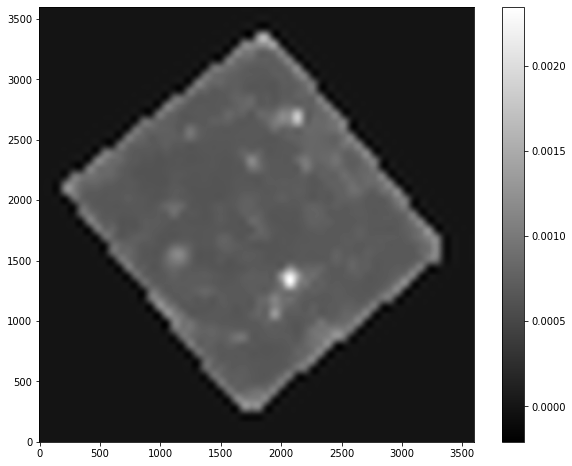

In [110]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('bkg_noise')

In [111]:
# subtract the background
data_sub = data - bkg

In [112]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [113]:
# how many objects were detected
len(objects)

7484

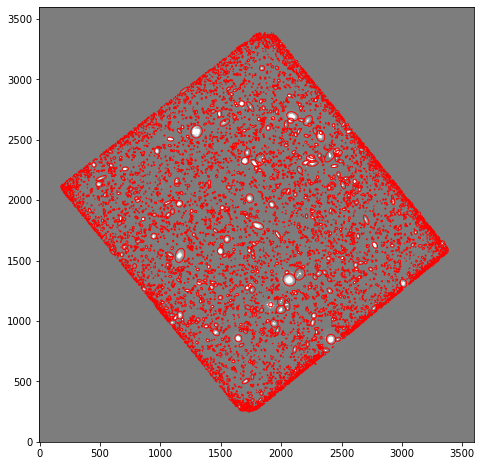

In [114]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [115]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [116]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [117]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.036277 +/- 0.190503
object 1: flux = 0.006989 +/- 0.083685
object 2: flux = 0.009308 +/- 0.096552
object 3: flux = 0.043034 +/- 0.207480
object 4: flux = 0.020212 +/- 0.142220
object 5: flux = 0.047050 +/- 0.216943
object 6: flux = 0.020593 +/- 0.143551
object 7: flux = 0.054143 +/- 0.232716
object 8: flux = 0.035985 +/- 0.189736
object 9: flux = 0.007299 +/- 0.085517
